<h1 align="center">Volume 4: Inverse Problems.</h1>

    Marcelo Leszynski
    Section 002
    02/03/22

In [5]:
from scipy import optimize, integrate
import numpy as np
from matplotlib import pyplot as plt

# Problem 1

Solve (16.2) for a(x).
Produce the plot shown in Figure 16.2.

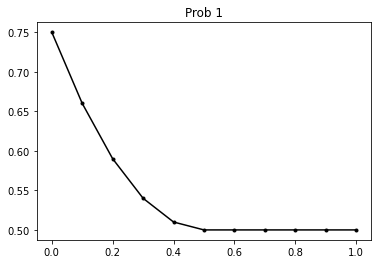

In [7]:
# initialize values for inverse problem ################################
c_0 = 3./8
c_1 = 5./4
xj_list = [0.1*j for j in range(11)]
aj_list = []

# define functions for inverse problem #################################
f = lambda x: -6*x**2 + 3*x - 1 if x <= 0.5 else -1
u = lambda x: x**2 + (x/2.) + (5./16)
u_p = lambda x: 2*x + (1./2)

# solve inverse problem ################################################
for xj in xj_list:
    aj_f = lambda a: (((c_0 - integrate.quad(f, 0, xj)[0])/a) - u_p(xj))**2
    aj_list.append(optimize.minimize(aj_f, 0.5).x)
    
# plot resulting values ################################################
plt.plot(xj_list, aj_list, '.-k')
plt.title('Prob 1')
plt.show()

# Problem 2

Find the density function a(x). Using several values of ε > 0.66049142, plot the corresponding
density a(x) for x in np.linspace(0,1,11) to demonstrate that the problem is ill-posed.

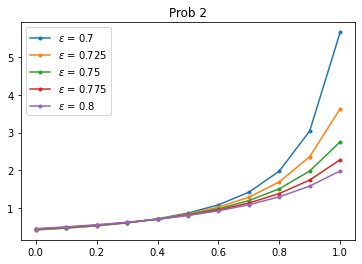

In [9]:
# initialize values for inverse problem ################################
c_0 = 1.
c_1 = 2.
xj_list = [0.1*j for j in range(11)]
f = lambda x: -1

# define functions for inverse problem #################################
for eps in np.linspace(0.7, 0.8, 5):
    u = lambda x: x + 1 + eps*np.sin((eps**(-2))*x)
    u_p = lambda x: 1 + (eps**(-1))*np.cos((eps**(-2))*x)
    aj_list = []
    
# solve inverse problem ################################################
    for xj in xj_list:
        aj_f = lambda a: (((c_0 - integrate.quad(f, 0, xj)[0])/a) - u_p(xj))**2
        aj_list.append(optimize.minimize(aj_f, 0.5).x)

# plot resulting values ################################################
    plt.plot(xj_list, aj_list, '.-' ,label='$\epsilon$ = '+str(eps))
    plt.title('Prob 2')
plt.legend()
plt.show()